In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
6,876 cases (7 day average) as of Tue 15 Jun, +340.9 since Mon 14 Jun
169 hospitalised (7 day average) as of Wed 16 Jun, +0.0 since Wed 16 Jun
8 died (7 day average) as of Tue 15 Jun, +0.9 since Mon 14 Jun


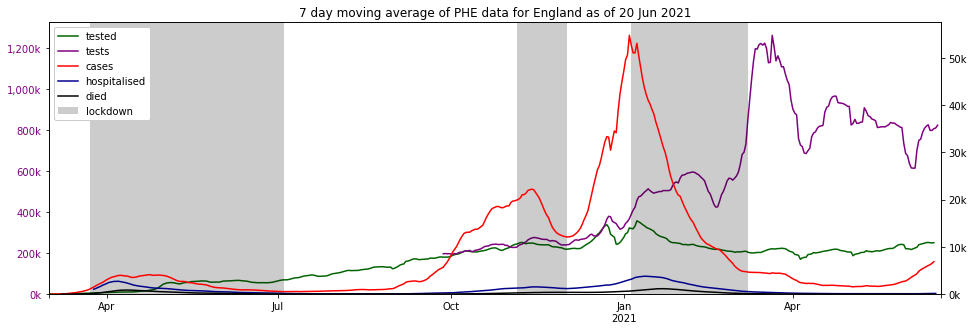

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

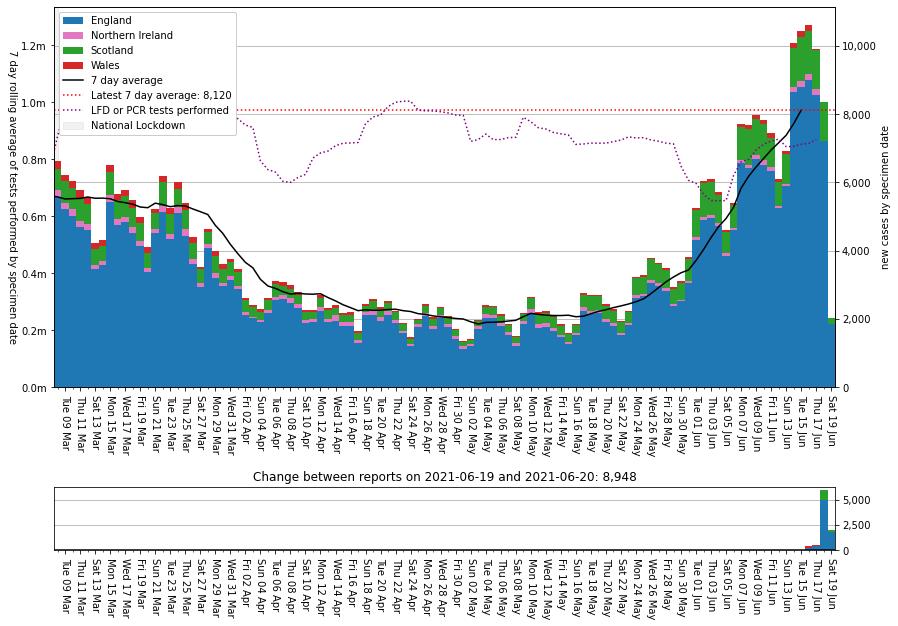

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

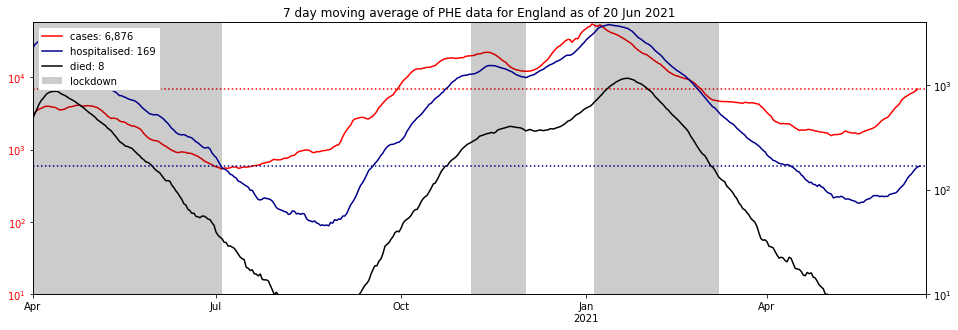

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

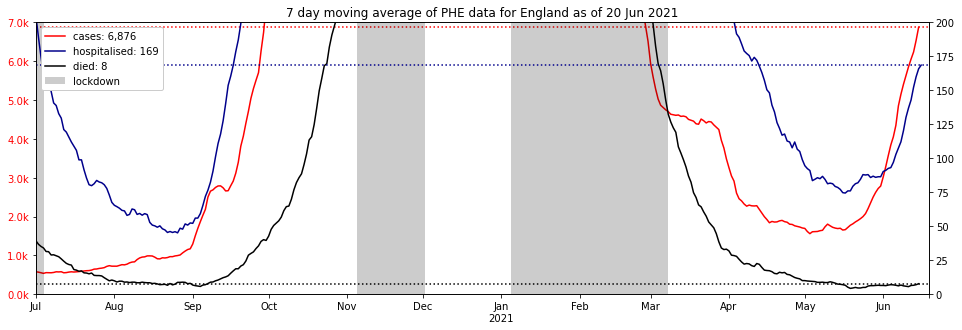

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=7_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,26456342.0,35959555.0,9503213.0,56286961,47.002612,16.883507,36.113881
1,Northern Ireland,N92000002,803384.0,1137778.0,334394.0,1893667,42.424777,17.658543,39.916680
2,Scotland,S92000003,2571637.0,3630589.0,1058952.0,5463300,47.071129,19.383010,33.545861
3,Wales,W92000004,1509144.0,2236091.0,726947.0,3152879,47.865586,23.056610,29.077805


'partial: 42,964,013 (64.3%), full: 31,340,507'

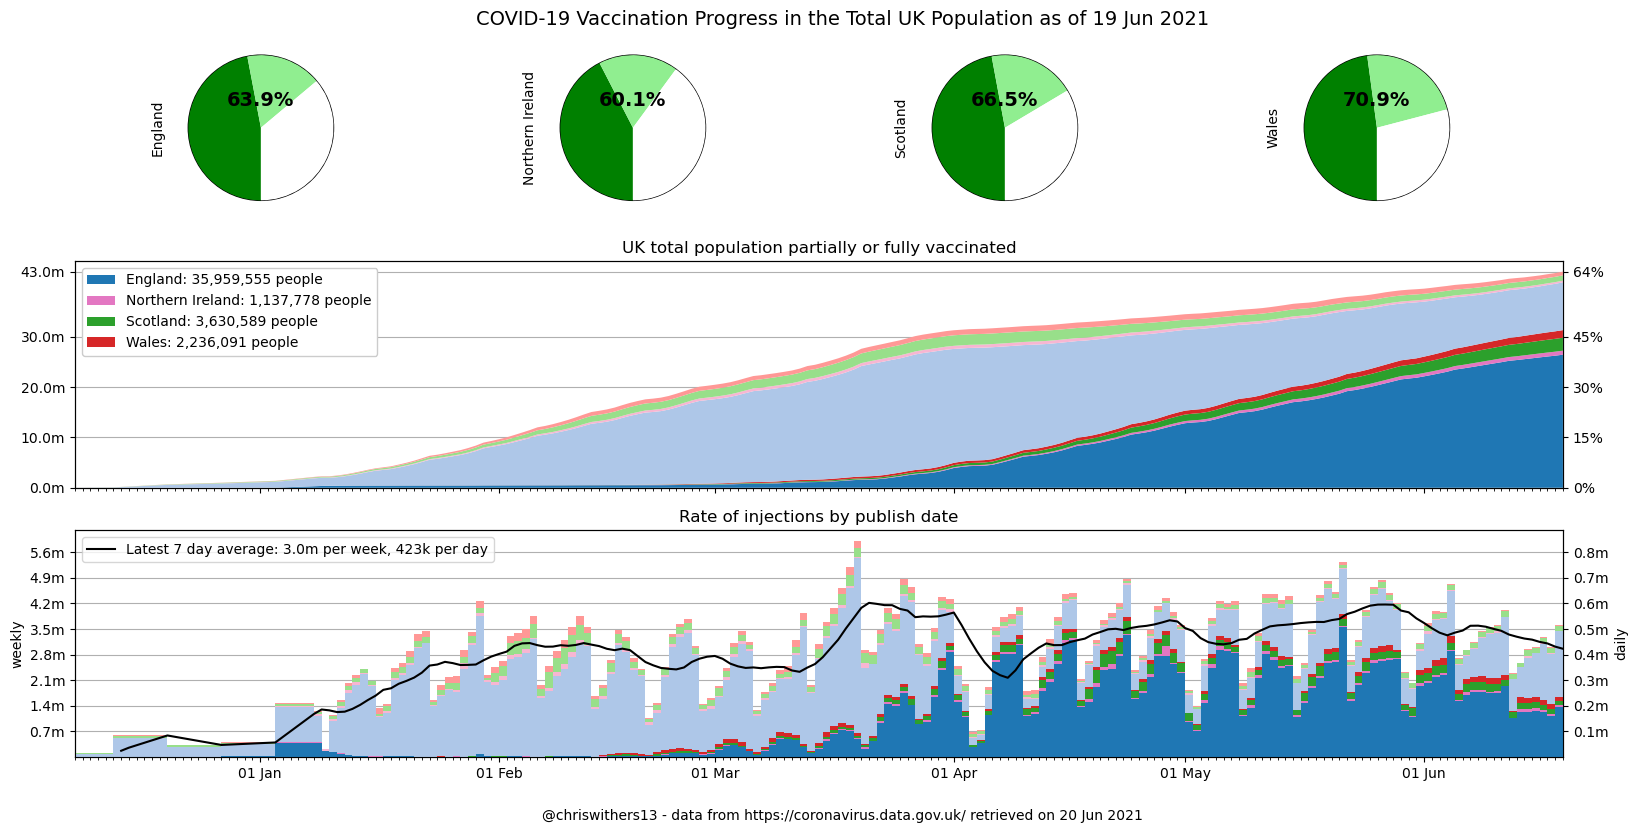

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

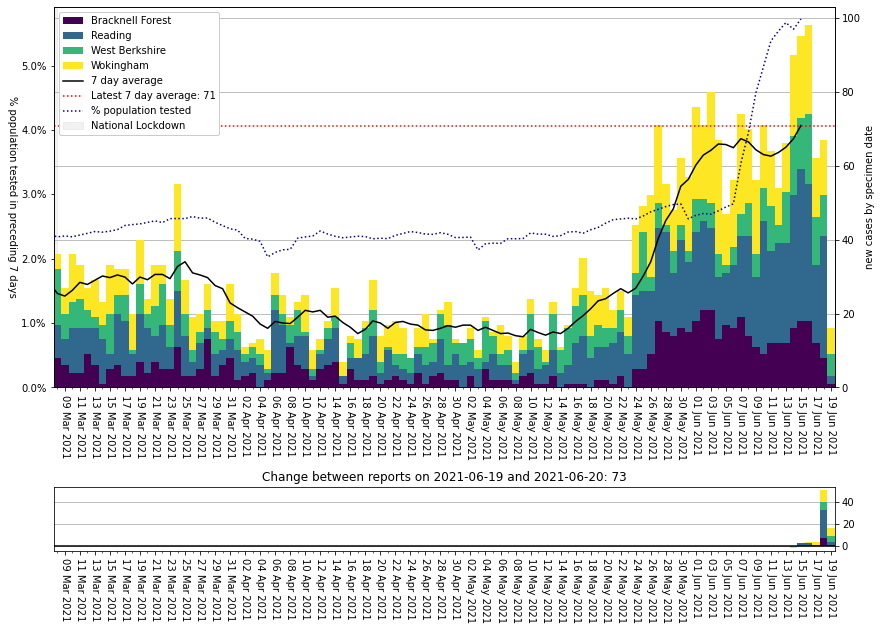

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=unique_people_tested)

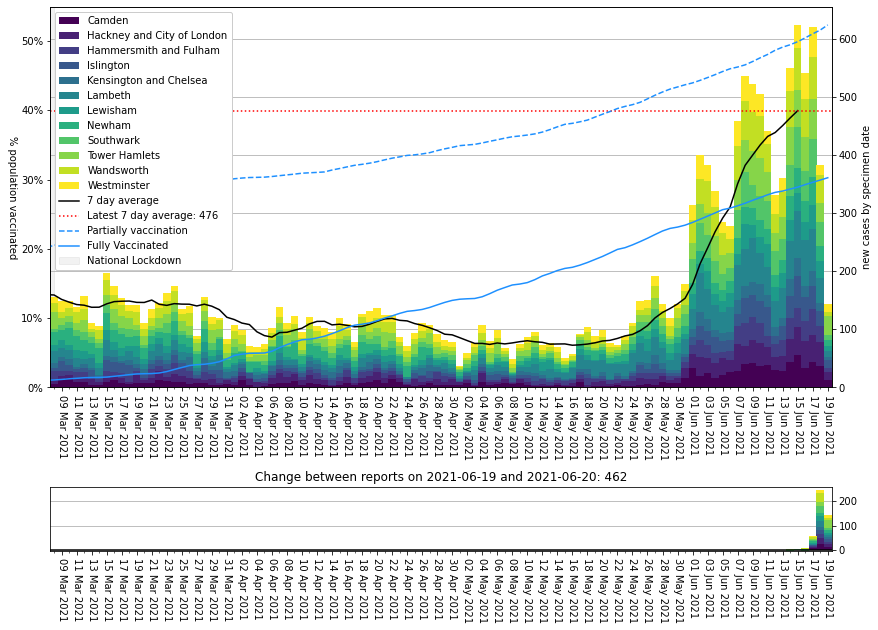

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000008,Blackburn with Darwen,455.589996,682.0,2021-06-19
E07000120,Hyndburn,403.489506,327.0,2021-06-19
E07000124,Ribble Valley,371.173302,226.0,2021-06-19
E07000117,Burnley,341.880342,304.0,2021-06-19
E08000003,Manchester,318.345760,1760.0,2021-06-19
E08000002,Bury,304.204409,581.0,2021-06-19
E07000118,Chorley,301.989578,357.0,2021-06-19
E07000122,Pendle,296.378322,273.0,2021-06-19
E08000006,Salford,291.692745,755.0,2021-06-19


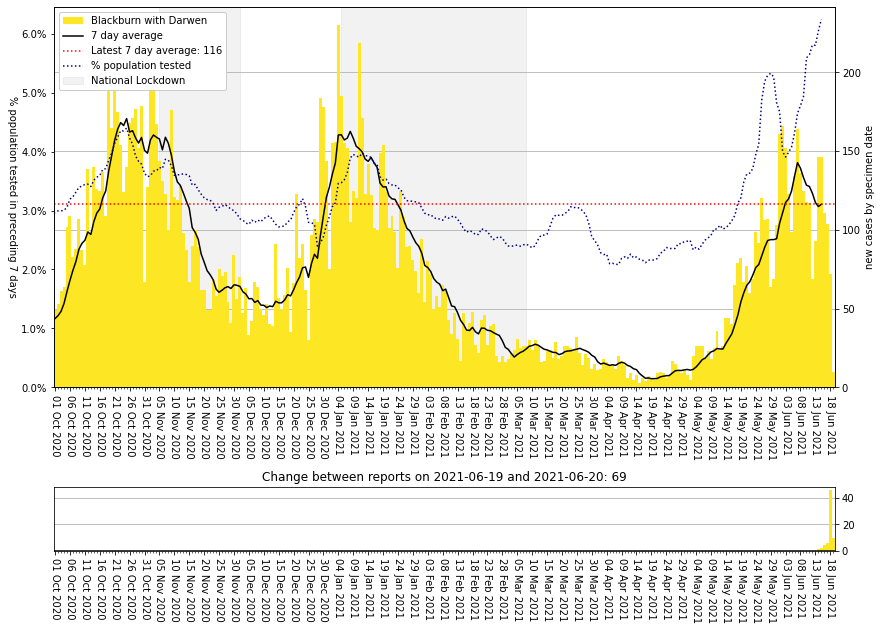

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000003,Manchester,318.345760,1760.0,2021-06-19
E08000035,Leeds,203.243063,1612.0,2021-06-19
E08000025,Birmingham,110.963588,1267.0,2021-06-19
S12000036,City of Edinburgh,205.551216,1079.0,2021-06-19
E08000012,Liverpool,196.770553,980.0,2021-06-19
S12000049,Glasgow City,151.630023,960.0,2021-06-19
E06000047,County Durham,178.647561,947.0,2021-06-19
E08000010,Wigan,268.360808,882.0,2021-06-19
E06000052,Cornwall and Isles of Scilly,139.558798,798.0,2021-06-19


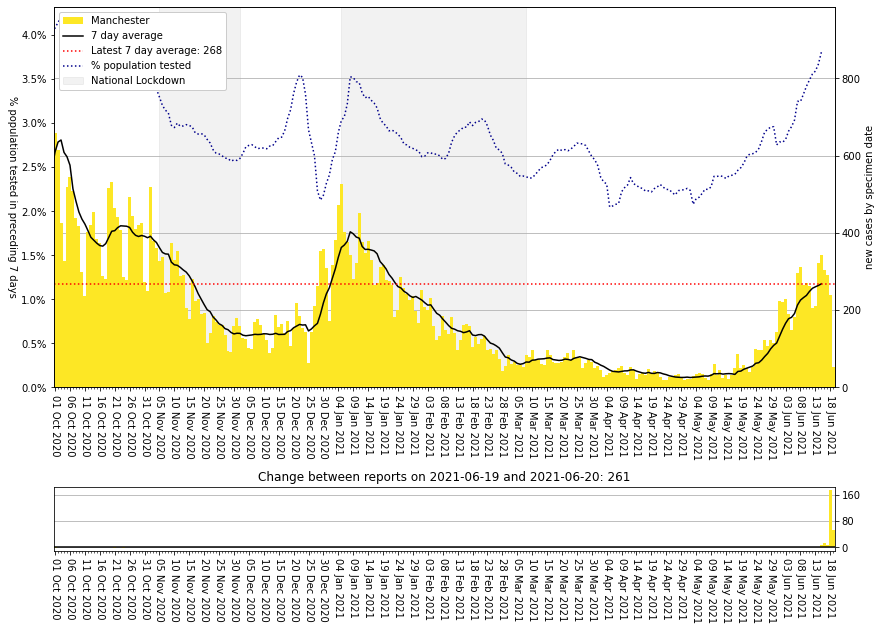

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

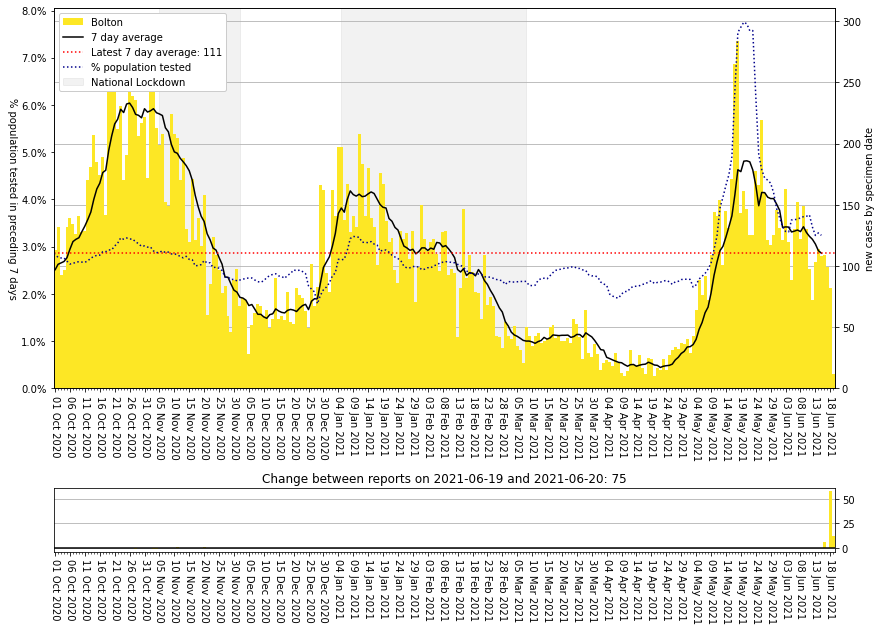

In [16]:
plot_areas(for_date, areas=['E08000001'], colormap='viridis_r', lines=unique_people_tested)

In [17]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.5

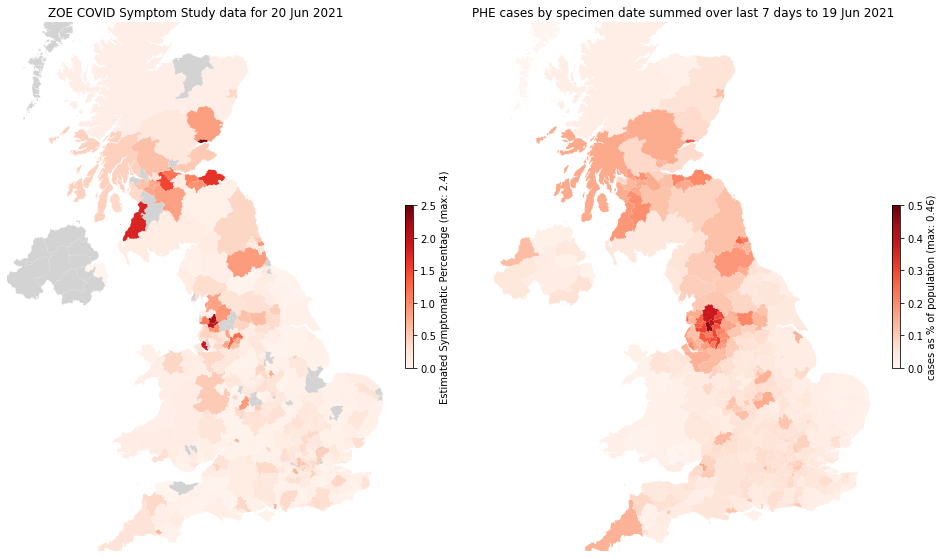

In [18]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [19]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...